# Analysis of hyperparameter search results

In the previous notebook we showed how to implement a randomized search for
tuning the hyperparameters of a `HistGradientBoostingClassifier` to fit the
`adult_census` dataset. In practice, a randomized hyperparameter search is
usually run with a large number of iterations.

In order to avoid the computational cost and still make a decent analysis, we
load the results obtained from a similar search with 500 iterations.

In [1]:
import pandas as pd

cv_results = pd.read_csv(
    "random_search_results.csv", index_col=0
)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_bins,param_classifier__max_leaf_nodes,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.384735,0.028353,0.063872,0.011545,0.003643,0.006954,136,7,46,{'classifier__l2_regularization': np.float64(0...,0.811110,0.813404,0.807535,0.812039,0.813404,0.811498,0.002164,220
1,0.165280,0.029995,0.027261,0.003329,0.000068,4.713986,2,66,7,{'classifier__l2_regularization': np.float64(6...,0.730722,0.682910,0.657658,0.719219,0.733279,0.704758,0.029639,448
2,0.508922,0.033357,0.073756,0.004274,46.346609,0.011492,86,18,5,{'classifier__l2_regularization': np.float64(4...,0.841136,0.828692,0.836609,0.832651,0.834152,0.834648,0.004139,161
3,0.306325,0.002655,0.047008,0.003410,0.004376,0.036193,115,3,10,{'classifier__l2_regularization': np.float64(0...,0.819026,0.813814,0.816271,0.813268,0.815179,0.815511,0.002047,210
4,0.277053,0.059194,0.044080,0.013675,11.866169,0.547657,5,7,2,{'classifier__l2_regularization': np.float64(1...,0.828170,0.827191,0.834562,0.827600,0.831286,0.829762,0.002799,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.431193,0.045479,0.066768,0.003767,2.561853,0.284833,145,10,33,{'classifier__l2_regularization': np.float64(2...,0.866521,0.871963,0.869779,0.866639,0.871553,0.869291,0.002332,4
496,0.532977,0.013556,0.079705,0.002277,0.000472,0.039836,78,16,19,{'classifier__l2_regularization': np.float64(0...,0.853692,0.858995,0.857221,0.852307,0.856675,0.855778,0.002435,50
497,0.862595,0.008430,0.087274,0.005320,0.000125,0.013261,6,68,13,{'classifier__l2_regularization': np.float64(0...,0.823529,0.823642,0.821867,0.824051,0.823232,0.823264,0.000746,195
498,0.138513,0.004952,0.026256,0.003547,13.797654,9.185270,13,7,1,{'classifier__l2_regularization': np.float64(1...,0.741777,0.498362,0.596233,0.737101,0.547775,0.624249,0.099024,478


We define a function to remove the prefixes in the hyperparameters column
names.

In [2]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,l2_regularization,learning_rate,max_bins,max_leaf_nodes,min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.384735,0.028353,0.063872,0.011545,0.003643,0.006954,136,7,46,{'classifier__l2_regularization': np.float64(0...,0.811110,0.813404,0.807535,0.812039,0.813404,0.811498,0.002164,220
1,0.165280,0.029995,0.027261,0.003329,0.000068,4.713986,2,66,7,{'classifier__l2_regularization': np.float64(6...,0.730722,0.682910,0.657658,0.719219,0.733279,0.704758,0.029639,448
2,0.508922,0.033357,0.073756,0.004274,46.346609,0.011492,86,18,5,{'classifier__l2_regularization': np.float64(4...,0.841136,0.828692,0.836609,0.832651,0.834152,0.834648,0.004139,161
3,0.306325,0.002655,0.047008,0.003410,0.004376,0.036193,115,3,10,{'classifier__l2_regularization': np.float64(0...,0.819026,0.813814,0.816271,0.813268,0.815179,0.815511,0.002047,210
4,0.277053,0.059194,0.044080,0.013675,11.866169,0.547657,5,7,2,{'classifier__l2_regularization': np.float64(1...,0.828170,0.827191,0.834562,0.827600,0.831286,0.829762,0.002799,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.431193,0.045479,0.066768,0.003767,2.561853,0.284833,145,10,33,{'classifier__l2_regularization': np.float64(2...,0.866521,0.871963,0.869779,0.866639,0.871553,0.869291,0.002332,4
496,0.532977,0.013556,0.079705,0.002277,0.000472,0.039836,78,16,19,{'classifier__l2_regularization': np.float64(0...,0.853692,0.858995,0.857221,0.852307,0.856675,0.855778,0.002435,50
497,0.862595,0.008430,0.087274,0.005320,0.000125,0.013261,6,68,13,{'classifier__l2_regularization': np.float64(0...,0.823529,0.823642,0.821867,0.824051,0.823232,0.823264,0.000746,195
498,0.138513,0.004952,0.026256,0.003547,13.797654,9.185270,13,7,1,{'classifier__l2_regularization': np.float64(1...,0.741777,0.498362,0.596233,0.737101,0.547775,0.624249,0.099024,478


As we have more than 2 parameters in our randomized-search, we cannot
visualize the results using a heatmap. We could still do it pair-wise, but
having a two-dimensional projection of a multi-dimensional problem can lead to
a wrong interpretation of the scores.

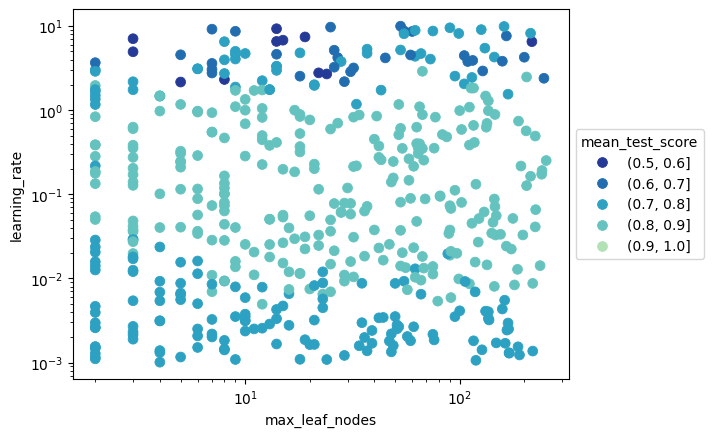

In [3]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(
    title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5)
)

In the previous plot we see that the top performing values are located in a
band of learning rate between 0.01 and 1.0, but we have no control in how the
other hyperparameters interact with such values for the learning rate.
Instead, we can visualize all the hyperparameters at the same time using a
parallel coordinates plot.

In [4]:
#!pip install plotly

In [9]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            "learning_rate": np.log10,
            "max_leaf_nodes": np.log2,
            "max_bins": np.log2,
            "min_samples_leaf": np.log10,
            "l2_regularization": np.log10,
            "mean_test_score": lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">We <strong>transformed most axis values by taking a log10 or log2</strong> to
spread the active ranges and improve the readability of the plot.</p>
</div>

The parallel coordinates plot displays the values of the hyperparameters on
different columns while the performance metric is color coded. Thus, we are
able to quickly inspect if there is a range of hyperparameters which is
working or not.

It is possible to **select a range of results by clicking and holding on any
axis** of the parallel coordinate plot. You can then slide (move) the range
selection and cross two selections to see the intersections. You can undo a
selection by clicking once again on the same axis.

In particular for this hyperparameter search, it is interesting to confirm
that the yellow lines (top performing models) all reach intermediate values
for the learning rate, that is, tick values between -2 and 0 which correspond
to learning rate values of 0.01 to 1.0 once we invert back the log10 transform
for that axis.

But now we can also observe that it is not possible to select the highest
performing models by selecting lines of on the `max_bins` axis with tick
values between 1 and 3.

The other hyperparameters are not very sensitive. We can check that if we
select the `learning_rate` axis tick values between -1.5 and -0.5 and
`max_bins` tick values between 5 and 8, we always select top performing
models, whatever the values of the other hyperparameters.

In this notebook, we saw how to interactively explore the results of a large
randomized search with multiple interacting hyperparameters. In particular we
observed that some hyperparameters have very little impact on the
cross-validation score, while others have to be adjusted within a specific
range to get models with good predictive accuracy.